In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/emails.csv")
df.head(15)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
x = df['text']
y = df['spam']

In [7]:
print(x)

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object


In [8]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['spam'], test_size=0.2, random_state=42)

In [10]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5728,)
(4582,)
(1146,)


In [11]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)


(5728,)
(4582,)
(1146,)


In [12]:
vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (1,2))

In [13]:
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train_vectorized, y_train)

MultinomialNB()

In [16]:
prediction = classifier.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classi_report = classification_report(y_test, prediction)

print('Accuracy:',accuracy)
print('Confusion_matrix:')
print(conf_matrix)
print("Classification Report:")
print(classi_report)

Accuracy: 0.9860383944153578
Confusion_matrix:
[[856   0]
 [ 16 274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       1.00      0.94      0.97       290

    accuracy                           0.99      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.99      0.99      0.99      1146



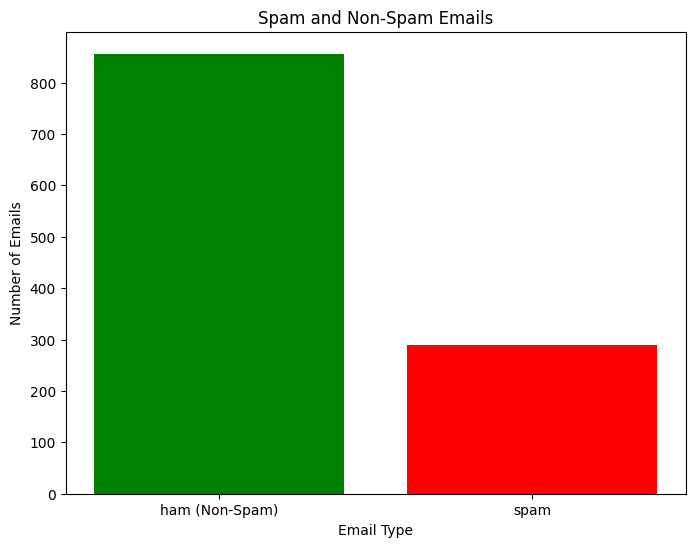

In [18]:
import matplotlib.pyplot as plt

spam_counts = y_test.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()

In [20]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(x_train_vectorized, y_train)

prediction = nb_model.predict(x_test_vectorized)

print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Accuracy score: 0.8394415357766143
Precision score: 1.0
Recall score: 0.36551724137931035
F1 score: 0.5353535353535354


In [21]:
models = [("Multinomial NB", classifier), ("Bernoulli NB", nb_model)]

metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test_vectorized)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

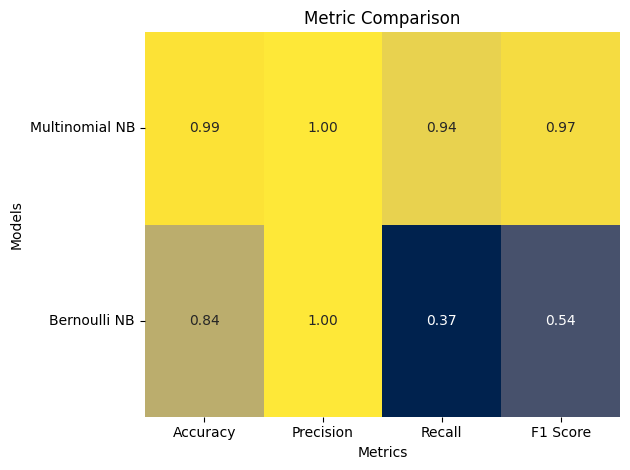

In [22]:
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="cividis", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()